## Proyecto 1

Alumno: Walter Alexander Ajtun Pisquiy


Link:Video

## 1.  Crear un entorno de anaconda con los paquetes que considere necesarios.

In [4]:
#Cargamos librerias
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LinearRegression


In [5]:
#Cargamos Data
datos = np.load('proyecto_training_data.npy')
print (datos)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [16]:
datos = np.load('proyecto_training_data.npy')
df = pd.DataFrame(datos)
df.columns =   ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


## Analizamos la data

In [8]:
print(datos.shape) # dimension 1460 filas y 6 columnas

print (datos.dtype) # tipo

print(datos.size)# tamano


(1460, 6)
float64
8760


## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80%) y validacion y pruebas(20%).

In [36]:
#Se realiza el Slicing en el data set, 80% del data para para entretenimiento y el 20 para confirmar los modelos.
# Primero obtenemos la cantidad total de filas en los datos para realizar el slicing
total_filas = datos.shape[0]

# Calculamos el número de filas para el conjunto de entrenamiento (80%)
filas_entrenamiento = int(0.8 * total_filas)

# Obtenemos los datos de entrenamiento
datos_entrenamiento = datos[:filas_entrenamiento]

# Obtenemos los datos de validación y pruebas
datos_validacion_pruebas = datos[filas_entrenamiento:]


## 3 . Analisis exploratorio de datos:
Para cada variable en el dataset calcular((usando numpy o
pandas):
media
valor maximo
valor mınimo
rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
desviaci´on est´andar.

In [54]:
#Estadistica
#Se crea un DataFrame llamado df con los datos, donde cada columna representa una variable diferente
#Se hace un ciclo para mostrar los datos
column_names = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(datos, columns=column_names)
print("Realizando análisis exploratorio para las variables")

# Calcular las estadísticas para cada variable
estadisticas = pd.DataFrame({
    'Variable': column_names,
    'Media': df.mean(),
    'Máximo': df.max(),
    'Mínimo': df.min(),
    'Rango': df.max() - df.min(),
    'Desviación Estándar': df.std()
})
#Se calculan varias estadísticas para cada variable del DataFrame, incluyendo la media, el valor máximo,
#el valor mínimo, el rango (diferencia entre el máximo y el mínimo), y la desviación estándar.
#Estas estadísticas se almacenan en un nuevo DataFrame llamado estadisticas.

# Mostrar las estadísticas utilizando tabulate
#Se utiliza la función tabulate de la biblioteca tabulate para mostrar las estadísticas de manera tabula
print(tabulate(estadisticas, headers='keys', tablefmt='fancy_grid', showindex=False))


Realizando análisis exploratorio para las variables
╒══════════════╤══════════════╤══════════╤══════════╤═════════╤═══════════════════════╕
│ Variable     │        Media │   Máximo │   Mínimo │   Rango │   Desviación Estándar │
╞══════════════╪══════════════╪══════════╪══════════╪═════════╪═══════════════════════╡
│ SalePrice    │ 180921       │   755000 │    34900 │  720100 │           79442.5     │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼───────────────────────┤
│ OverallQual  │      6.09932 │       10 │        1 │       9 │               1.383   │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼───────────────────────┤
│ 1stFlrSF     │   1162.63    │     4692 │      334 │    4358 │             386.588   │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼───────────────────────┤
│ TotRmsAbvGrd │      6.51781 │       14 │        2 │      12 │               1.62539 │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼─────

### 4.	Para  cada  variable  en  el  dataset  usar  seaborn(funcion  distplot  https://seaborn.pydata. org/generated/seaborn.distplot.html) para graficar un histograma de la variable.
Estaditica

C:\Users\walte\AppData\Local\Temp\ipykernel_36812\259197318.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=False, color='blue', bins=20)  # Graficar histograma con 20 bins


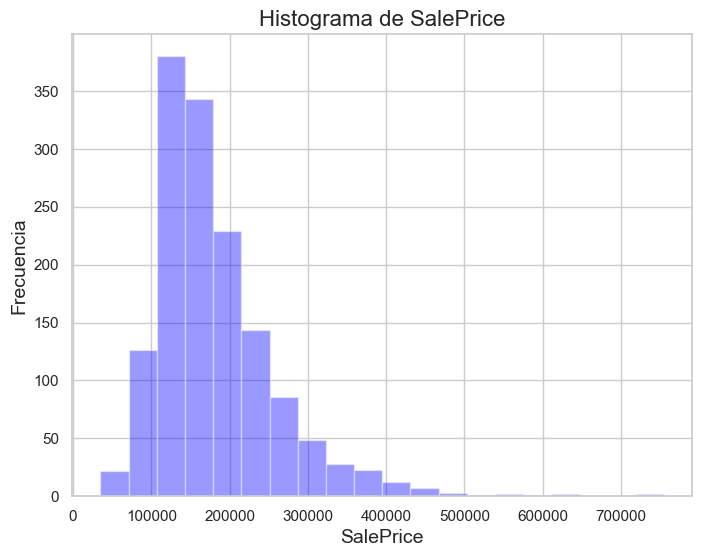

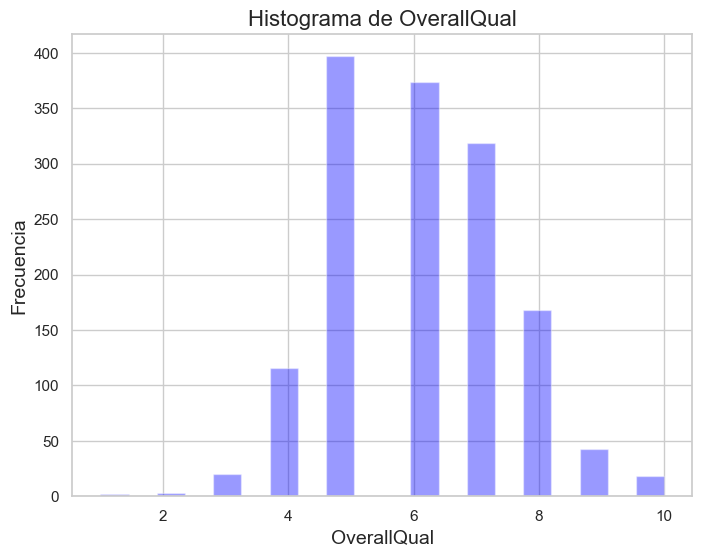

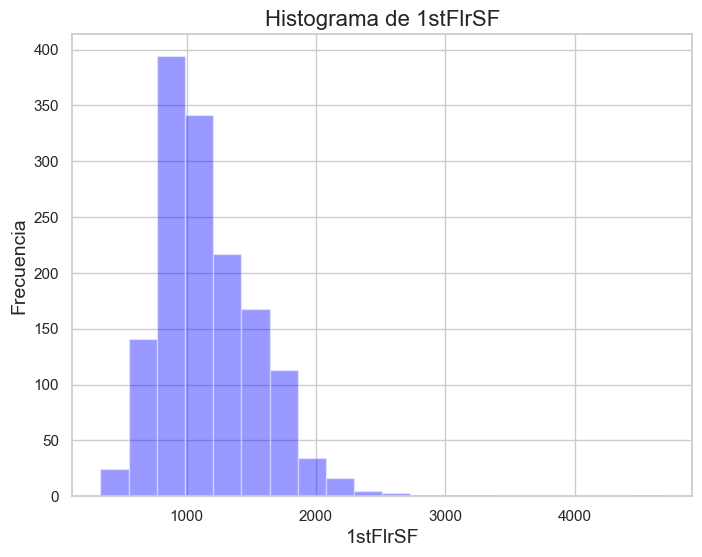

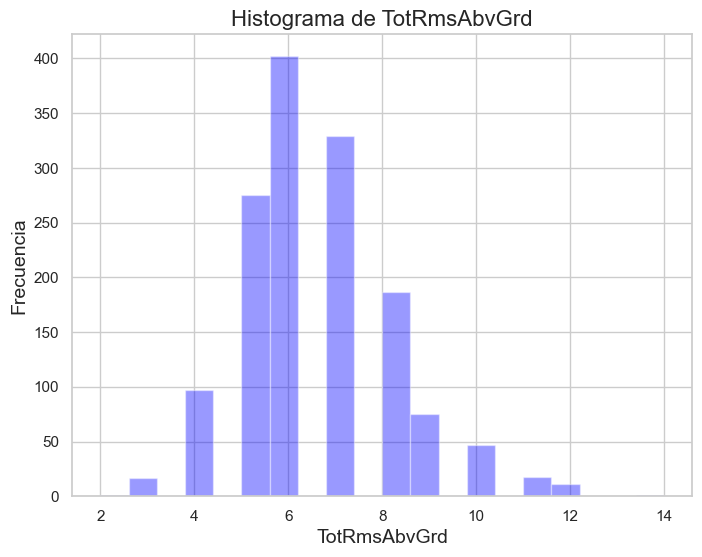

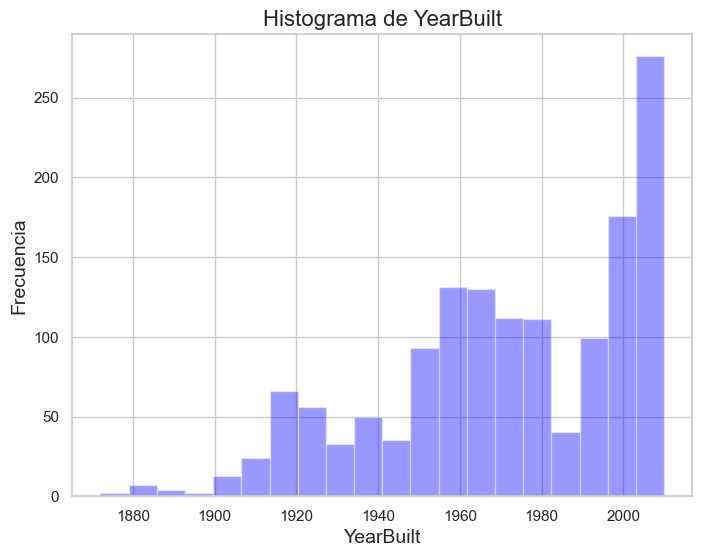

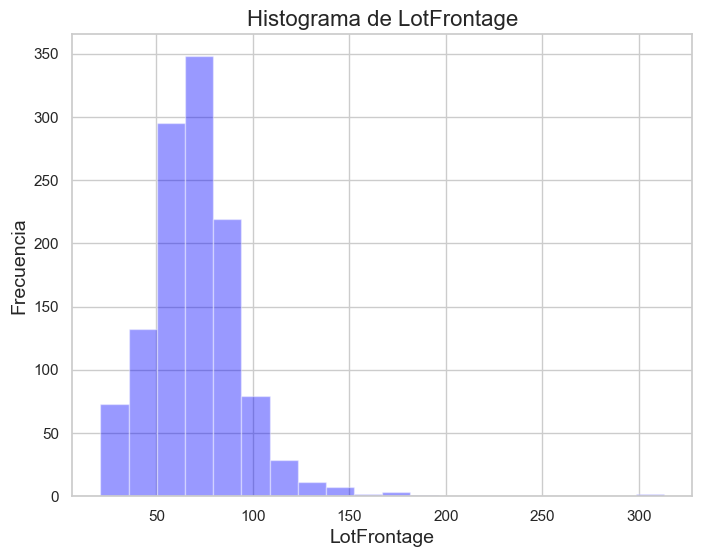

In [55]:
#Se definen los nombres de las columnas del DataFrame como una lista column_names. 
#Luego, se crea un DataFrame df a partir de los datos utilizando estos nombres de columna.

column_names = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(datos, columns=column_names)

# Configurar el estilo de los gráficos
#Se establece el estilo de los gráficos utilizando la función set de seaborn. 
#En este caso, se utiliza el estilo "whitegrid", que muestra una cuadrícula blanca de fondo en los gráficos
sns.set(style="whitegrid")

# Iterar sobre cada variable y graficar su histograma
for column in column_names:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[column], kde=False, color='blue', bins=20)  # Graficar histograma con 20 bins
    plt.title(f'Histograma de {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.show()
    
#Se itera sobre cada variable en la lista column_names y se grafica un histograma para cada una de ellas.
#Dentro del bucle, se crea una figura de tamaño 8x6 (plt.figure(figsize=(8, 6))),
#se utiliza la función distplot de seaborn para graficar el histograma (sns.distplot(df[column], kde=False, color='blue', bins=20)), 
#se establece el título del histograma con el nombre de la variable (plt.title(f'Histograma de {column}', fontsize=16)),
#se etiquetan los ejes x e y (plt.xlabel(column, fontsize=14) y plt.ylabel('Frecuencia', fontsize=14)),
#y finalmente se muestra el histograma en la ventana actual (plt.show()).


## 5. Para cada variable independiente x :
Calcular el coeficiente de correlacion entre x y y.
Graficar x vs y(scatterplot) usando matplotlib.
Colocar el coeficiente de correlaci´on y colocarlo como parte del tıtulo de la grafica.
Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables
con mas potencial predictivo es decir las 2 variables que presentan mayor correlaci´on
entre dicha variable y la variable dependiente.

Se toma como variable dependiente "SalePrice "al precio de las casas, de esta forma se analizar el impacto y el precion, con esto las variables
independientes son OverallQual, 1stFlrSF, TotRmsAbvGrd, YearBuilt, LotFrontage

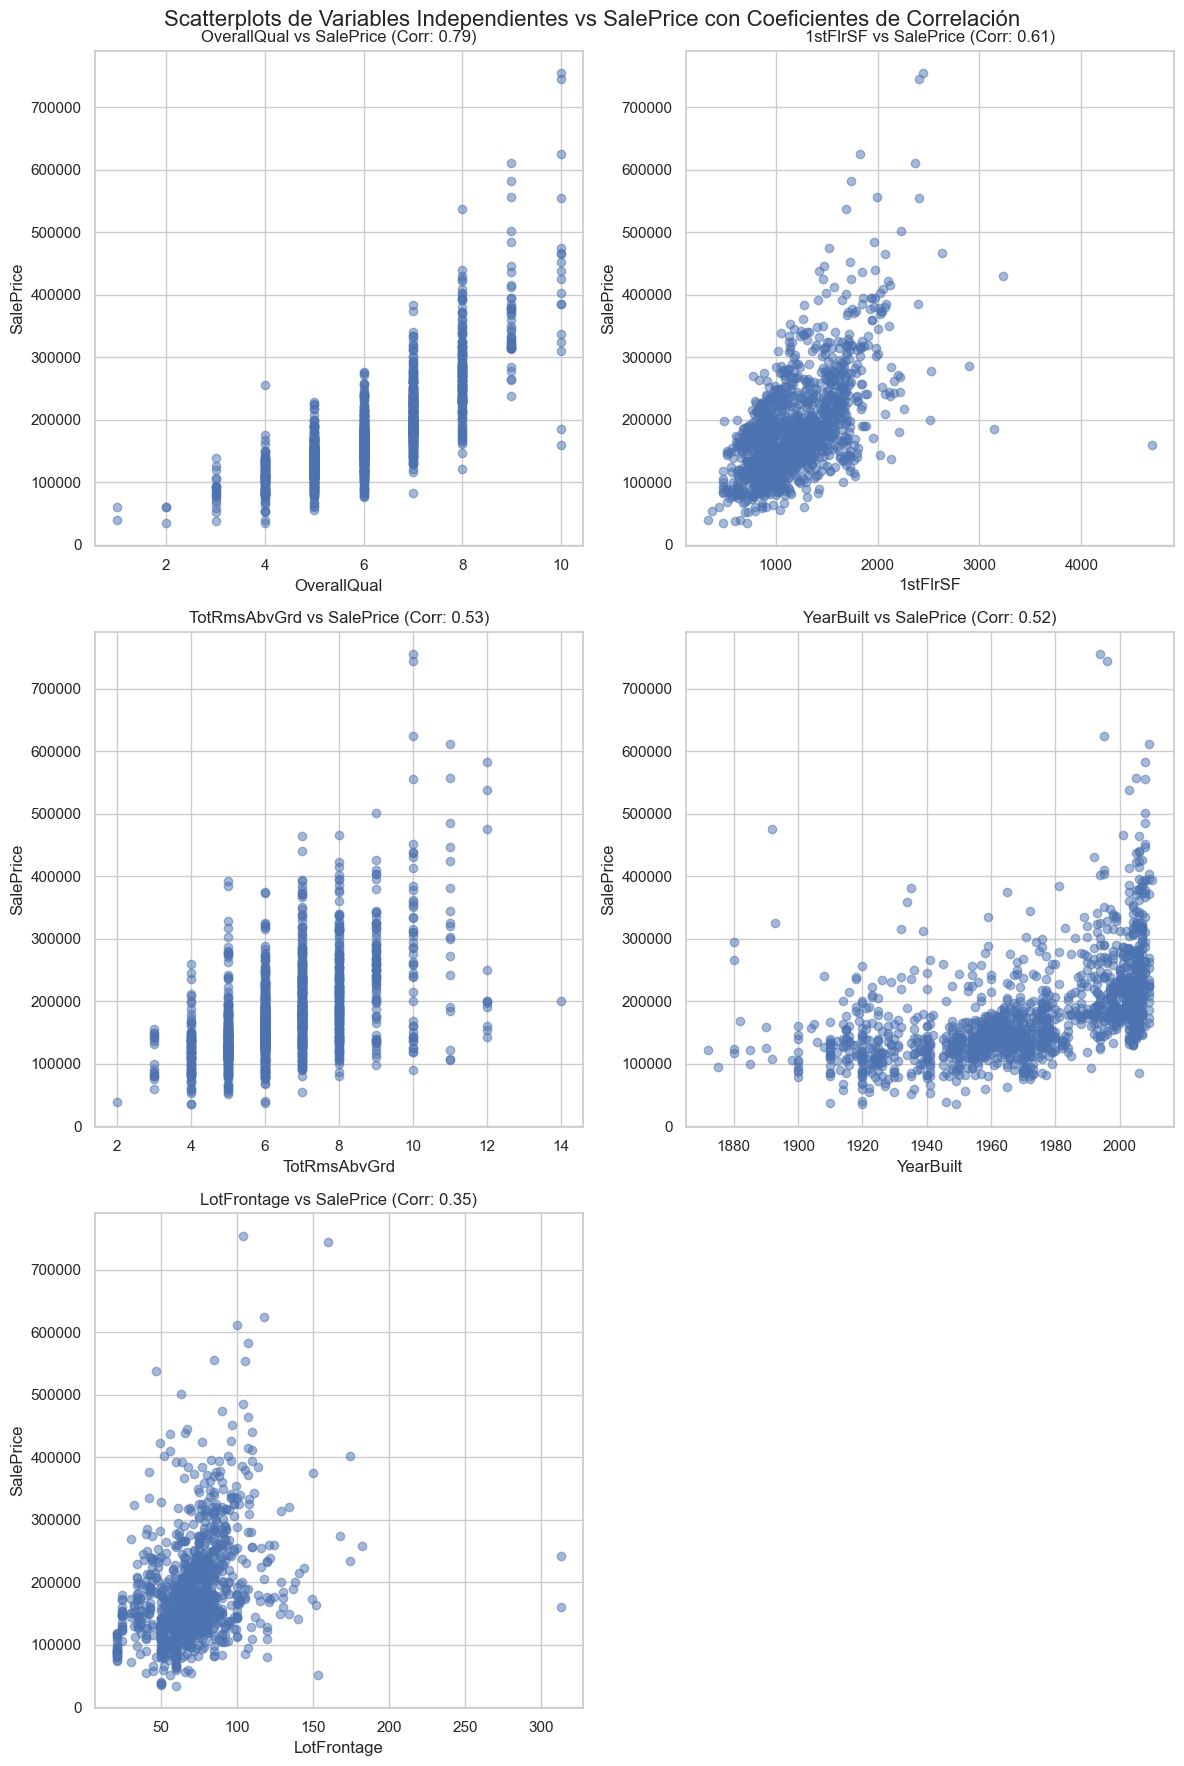

Las 2 variables con mayor potencial predictivo son: ['OverallQual', '1stFlrSF']


In [56]:
# Asignar nombres a las columnas 
column_names = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(datos, columns=column_names)

#Se calcula el coeficiente de correlación entre cada variable independiente x y la variable dependiente y (en este caso, 'SalePrice'). 
#Se elimina la correlación de 'SalePrice' consigo misma utilizando drop('SalePrice').
correlation_coeffs = df.corr()['SalePrice'].drop('SalePrice') 

#Se calcula el número de subgráficos necesarios para mostrar todos los scatterplots. 
#Se establece un número fijo de columnas (num_cols = 2) y se calcula el número de filas necesario para acomodar todos los scatterplots.
num_plots = len(correlation_coeffs)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

#Se crea una figura con subgráficos para mostrar los scatterplots de cada variable independiente vs 'SalePrice'.
#Para cada scatterplot, se itera sobre las columnas de correlation_coeffs, 
#se grafica un scatterplot de esa columna vs 'SalePrice', y se muestra el coeficiente de correlación en el título del gráfico.
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
fig.suptitle('Scatterplots de Variables Independientes vs SalePrice con Coeficientes de Correlación', fontsize=16)

for i, column in enumerate(correlation_coeffs.index):
    ax = axs[i // num_cols, i % num_cols]
    ax.scatter(df[column], df['SalePrice'], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'{column} vs SalePrice (Corr: {correlation_coeffs[column]:.2f})')

# Ocultar cualquier subgráfico vacío
for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

#Se seleccionan las 2 variables con mayor coeficiente de correlación (absoluto) con 'SalePrice' y se imprimen sus nombres.
top_variables = correlation_coeffs.abs().nlargest(2).index.tolist()
print(f'Las 2 variables con mayor potencial predictivo son: {top_variables}')


## Modelo lineal
La funcion recibe como argumentos:
#### 6.1 Vector con la variable independiente x,
#### 6.2 Vector con la variable dependiente y,
#### 6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
#### 6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos
imprimir a trav´es de print: el n´umero de iteraci´on, el error del modelo en esa iteraci
´on, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:
10,20,30,40,50.
#### 6.5 escalar α(learning rate): es usado como parte de la expresion matematica para actualizar
en cada iteraci´on los par´ametros del modelo.

In [150]:
#Se crea calase y se utiliza POO
class MySimpleRegression:

    def __init__(self, beta0, beta1):
        """
        Constructor de la clase, inicializa los coeficientes
        :param beta0: Intercepto de la recta
        :param beta1: Pendiente de la recta
        """
        self.beta0 = beta0
        self.beta1 = beta1
        self.models = {}  # Para almacenar los coeficientes de cada iteración
        self.errors = []  # Para almacenar el error de cada iteración

    def train_model(self, x, y, epochs, print_error_every, learning_rate):
        x = np.array(x)
        y = np.array(y)
        mat = np.column_stack((x, np.ones_like(x)))  # Crear matriz de diseño
        model = np.array([self.beta1, self.beta0])  # Modelo inicial
        
        for k in range(epochs):
            y_hat = np.dot(mat, model)  # Predicciones del modelo actual
            error = (1 / 2) * np.mean((y_hat - y) ** 2)  # Cálculo del error cuadrático medio
            if (k + 1) % print_error_every == 0:
                print(f'Iteración {k + 1}: Error {error}')
            self.errors.append(error)
            
            # Gradientes para actualización de coeficientes
            gradient = np.array([
                np.mean((y_hat - y) * x),
                np.mean(y_hat - y)
            ])
            
            model = model - learning_rate * gradient  # Actualización de coeficientes
            self.models[k] = model

        return self.models, self.errors

    def grafi_errores(self):
        if len(self.errors) == 0:
            print("Aún no se cuentan con errores para graficar.")
            return
        
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(self.errors)), self.errors, label='Error a lo largo de las iteraciones')  # Se agregó esta línea
        plt.xlabel('Iteración')
        plt.ylabel('Error')
        plt.title('Error a lo largo de las iteraciones')
        plt.legend()
        plt.show()

    def grafi_model(self, n):
        # Solo graficamos los modelos cada n iteraciones
        selected_keys = [key for key in self.models.keys() if key % n == 0]
        values = np.array([self.models[key] for key in selected_keys])
        x = values[:, 0]
        y = values[:, 1]

        plt.figure(figsize=(10, 5))
        plt.scatter(x, y, label=f'Coeficientes cada {n} iteraciones')
        plt.xlabel('Beta1 (pendiente)')
        plt.ylabel('Beta0 (intercepto)')
        plt.title('Evolución de los coeficientes del modelo')
        plt.legend()
        plt.show()
        
    def plot_model_evolution(self, x, y, n_iter=5):
        X = np.column_stack((x, np.ones_like(x)))
        for epoch, model in self.models.items():
            if epoch < n_iter:
                y_pred = np.dot(X, np.array([model['beta1'], model['beta0']]))
                plt.plot(x, y_pred, label=f'Epoch {epoch}')
        plt.scatter(x, y, color='red', label='Datos reales')
        plt.title(f'Evolución del modelo durante las primeras {n_iter} iteraciones')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()
        
    def plot_betas_evolution(self):
        """
        Grafica la evolución de los coeficientes beta0 y beta1 a lo largo de las iteraciones.
        """
        if not self.models:
            print("No hay modelos para graficar. Entrena el modelo primero.")
            return

        beta0_values = [model[1] for model in self.models.values()]  # Interceptos beta0
        beta1_values = [model[0] for model in self.models.values()]  # Pendientes beta1
        epochs = list(self.models.keys())

        plt.figure(figsize=(10, 5))
        plt.plot(epochs, beta0_values, label='beta0 (intercepto)')
        plt.plot(epochs, beta1_values, label='beta1 (pendiente)')
        plt.xlabel('Epochs')
        plt.ylabel('Valor de los coeficientes')
        plt.title('Evolución de los coeficientes beta0 y beta1')
        plt.legend()
        plt.show()
        

Iteración 10: Error 1428625206.2481086
Iteración 20: Error 1424483852.049184
Iteración 30: Error 1422166081.1710074
Iteración 40: Error 1419870388.6591206
Iteración 50: Error 1417596500.9827394
Iteración 60: Error 1415344211.0339682
Iteración 70: Error 1413113313.674339
Iteración 80: Error 1410903605.7138166
Iteración 90: Error 1408714885.892298
Iteración 100: Error 1406546954.861277


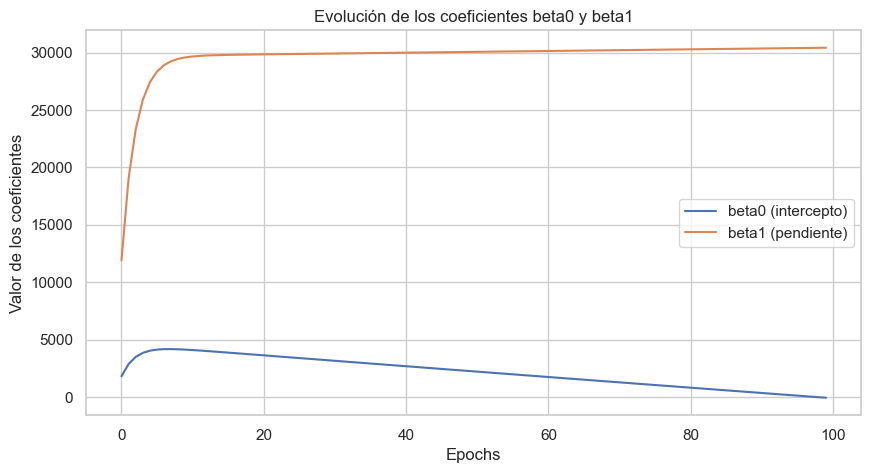

In [163]:
# Asumiendo que la clase MySimpleRegression y el DataFrame df ya están definidos
ModeloOverallQual = MySimpleRegression(1, 1)
mo_manual, errs = ModeloOverallQual.train_model(
    x=df['OverallQual'],
    y=df['SalePrice'],
    epochs=100,
    print_error_every=10,
    learning_rate=0.01
)

ModeloOverallQual.plot_betas_evolution()


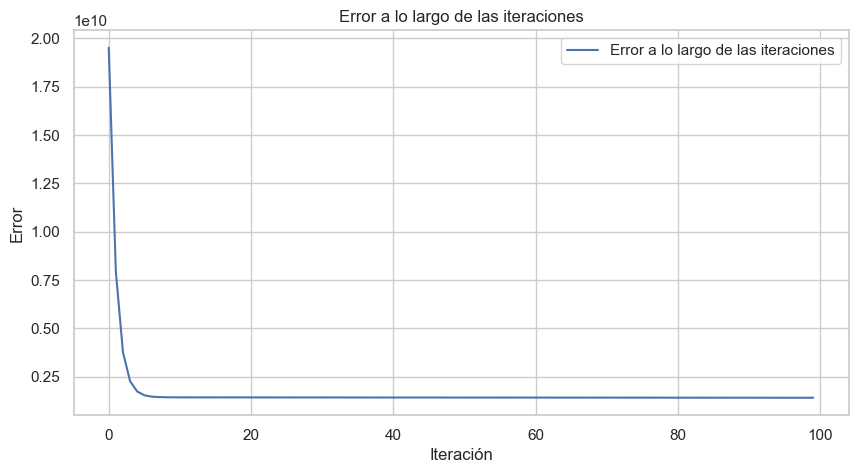

In [160]:
ModeloOverallQual.grafi_errores()

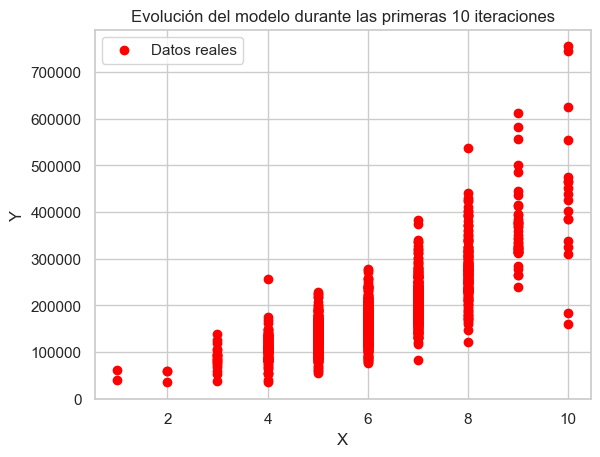

In [161]:
#ModeloOverallQual.grafi_model(mo_manual,1200)
ModeloOverallQual = MySimpleRegression(1, 1)
mo_manual = ModeloOverallQual.plot_model_evolution(
    x=df['OverallQual'],
    y=df['SalePrice'],
 n_iter=10
)



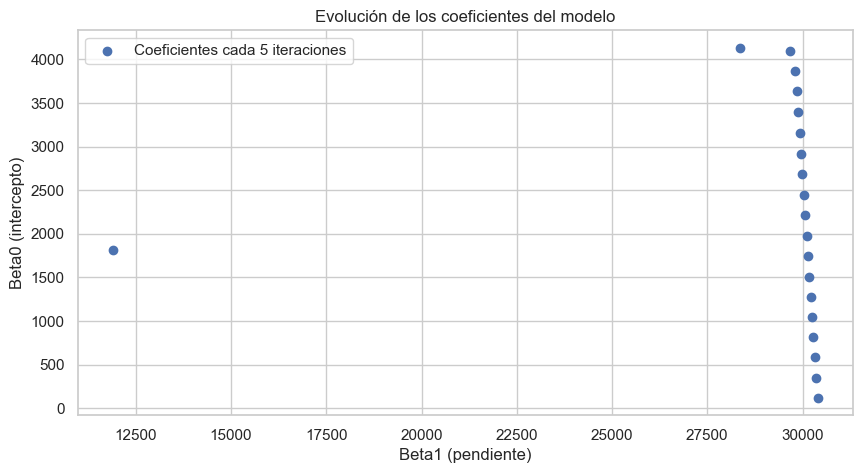

In [179]:
ModeloOverallQual.grafi_model(5)

Iteración 10: Error 2061079271.3677561
Iteración 20: Error 2061010885.5769331
Iteración 30: Error 2061010755.982646
Iteración 40: Error 2061010626.4564981
Iteración 50: Error 2061010496.930609
Iteración 60: Error 2061010367.4049768
Iteración 70: Error 2061010237.8796027
Iteración 80: Error 2061010108.3544862
Iteración 90: Error 2061009978.8296278
Iteración 100: Error 2061009849.3050263


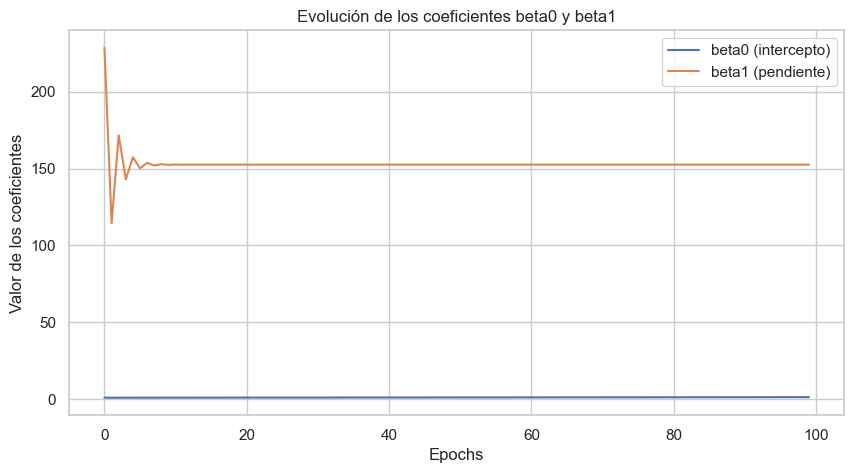

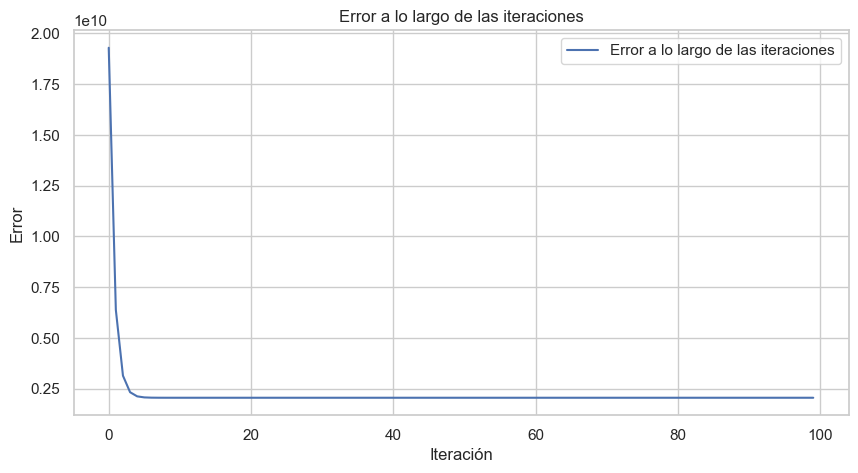

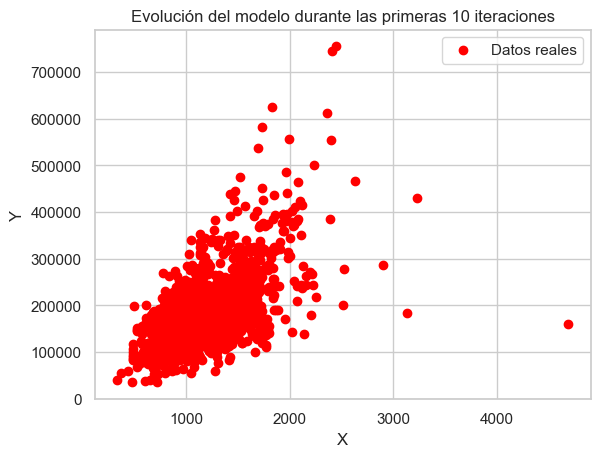

In [181]:
#ModeloOverallQual.grafi_model(mo_manual,1200)
Modelo1stFlrSF = MySimpleRegression(1, 1)
m2_manual, ers = Modelo1stFlrSF.train_model(
    x=df['1stFlrSF'],
    y=df['SalePrice'],
    epochs=100,
    print_error_every=10,
    learning_rate=0.000001
)

# Llamas al método para graficar la evolución de los betas. No es necesario pasar argumentos a este método.
Modelo1stFlrSF.plot_betas_evolution()

Modelo1stFlrSF.grafi_errores()

#ModeloOverallQual.grafi_model(mo_manual,1200)
Modelo1stFlrSF = MySimpleRegression(1, 1)
mo_manual = Modelo1stFlrSF.plot_model_evolution(
    x=df['1stFlrSF'],
    y=df['SalePrice'],
 n_iter=10
)



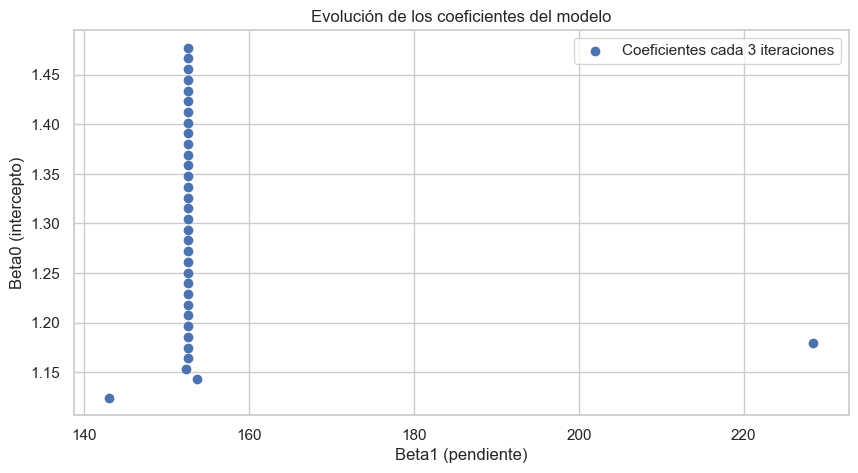

In [175]:
FstFlrSFModel.grafi_model(3)

In [172]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(df[['OverallQual']], df['SalePrice'])
model2 = LinearRegression().fit(df[['1stFlrSF']], df['SalePrice'])


